<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Carga y manipulación de datos con pandas

_ __pandas es una biblioteca de análisis de datos en Python__ que nos provee de las estructuras de datos y herramientas para realizar análisis de manera rápida. Se articula sobre la biblioteca NumPy y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales que requieren seguir un proceso de carga, limpieza, filtrado, reduccióń y análisis. _

_En esta clase veremos como cargar y guardar datos, las características de las pricipales estructuras de pandas y las aplicaremos a algunos problemas._

In [1]:
# Importamos pandas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Cargando los datos y explorándolos

Trabajaremos sobre un fichero de datos metereológicos de la Consejeria Agricultura Pesca y Desarrollo Rural Andalucía.

In [2]:
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

In [3]:
# Vemos qué pinta tiene el fichero
!head ../data/tabernas_meteo_data.txt

FECHA    DIA Al04TMax Al04TMin Al04TMed Al04Precip 
-------- --- -------- -------- -------- ---------- 
13-12-16 348     14.6      4.0      8.9        0.2 
12-12-16 347     15.9      3.0      8.7        0.2 
11-12-16 346     16.9      5.0     10.2        0.2 
10-12-16 345     16.4      6.3     10.9        0.2 
09-12-16 344     13.6      9.5     11.2        1.8 
08-12-16 343     14.5      5.4     10.4        0.0 
07-12-16 342     15.7      6.1     10.1        0.2 
06-12-16 341     17.7      7.1     13.4        0.0 


Vemos que los datos no están en formato CSV, aunque sí tienen algo de estructura. Si intentamos cargarlos con pandas no tendremos mucho éxito:

In [4]:
# Tratamos de cargarlo en pandas
pd.read_csv("../data/tabernas_meteo_data.txt").head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


Tenemos que hacer los siguientes cambios:

* Separar los campos por un número arbitrario de espacios en blanco.
* Saltar las primeras líneas.
* Dar nombres nuevos a las columnas.
* Descartar la columna del día del año (podemos calcularla luego).
* Parsear las fechas en el formato correcto.

In [5]:
data = pd.read_csv(
    "../data/tabernas_meteo_data.txt",
    delim_whitespace=True,   # delimitado por espacios en blanco
    usecols=(0, 2, 3, 4, 5),  # columnas que queremos usar
    skiprows=2,  # saltar las dos primeras líneas
    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates=['DATE'],
#     date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%y'),  # Parseo manual
    dayfirst=True,  # ¡Importante
    index_col=["DATE"]  # Si queremos indexar por fechas
)

# Ordenando de más antigua a más moderna
data.sort_index(inplace=True)

# Mostrando sólo las primeras o las últimas líneas
data.head()

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-01,18.0,2.5,11.1,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-03,15.1,0.8,7.9,0.0
2004-01-04,16.2,-0.4,7.2,0.0
2004-01-05,16.4,0.6,7.1,0.0


In [6]:
# Comprobamos los tipos de datos de la columnas
data.dtypes

TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

Las fechas también se pueden parsear de manera manual con el argumento:

```
date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%y'),  # Parseo manual
```

<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

In [7]:
# Pedomos información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2004-01-01 to 2016-12-13
Data columns (total 4 columns):
TMAX      4713 non-null float64
TMIN      4713 non-null float64
TMED      4713 non-null float64
PRECIP    4713 non-null float64
dtypes: float64(4)
memory usage: 184.8 KB


In [8]:
# Descripción estadística
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,23.224761,9.676872,16.276321,0.650583
std,7.318656,6.263303,6.638529,3.273346
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


In [9]:
# Una vez convertido en un objeto fecha se pueden obtener cosas como:
data.index.dayofweek

array([3, 4, 5, ..., 6, 0, 1], dtype=int32)

## Accediendo a los datos 

Tenemos dos formas de acceder a las columnas: por nombre o por atributo (si no contienen espacios ni caracteres especiales).

In [10]:
# Accediendo como clave
data['TMAX'].head()

DATE
2004-01-01    18.0
2004-01-02    17.4
2004-01-03    15.1
2004-01-04    16.2
2004-01-05    16.4
Name: TMAX, dtype: float64

In [11]:
# Accediendo como atributo
data.TMIN.head()

DATE
2004-01-01    2.5
2004-01-02    5.7
2004-01-03    0.8
2004-01-04   -0.4
2004-01-05    0.6
Name: TMIN, dtype: float64

In [12]:
# Accediendo a varias columnas a la vez
data[['TMAX', 'TMIN']].head()

,TMAX,TMIN
DATE,,
2004-01-01,18.0,2.5
2004-01-02,17.4,5.7
2004-01-03,15.1,0.8
2004-01-04,16.2,-0.4
2004-01-05,16.4,0.6


In [13]:
# Modificando valores de columnas
data[['TMAX', 'TMIN']] / 10

,TMAX,TMIN
DATE,,
2004-01-01,1.80,0.25
2004-01-02,1.74,0.57
2004-01-03,1.51,0.08
2004-01-04,1.62,-0.04
2004-01-05,1.64,0.06
2004-01-06,1.65,0.04
2004-01-07,1.60,0.14
2004-01-08,1.99,0.61
2004-01-09,2.03,0.72


In [14]:
# Aplicando una función a una columna entera (ej. media numpy)
import numpy as np
np.mean(data.TMAX)

23.224761298535967

In [15]:
# Calculando la media con pandas
data.TMAX.mean()

23.224761298535967

Para acceder a las filas tenemos dos métodos: `.loc` (basado en etiquetas), `.iloc` (basado en posiciones enteras) y `.ix` (que combina ambos).

In [16]:
# Accediendo a una fila por índice
data.iloc[1]

TMAX      17.4
TMIN       5.7
TMED      10.6
PRECIP     0.0
Name: 2004-01-02 00:00:00, dtype: float64

In [17]:
# Accediendo a una fila por etiqueta
data.loc["2016-09-02"]

TMAX      31.8
TMIN      16.3
TMED      23.2
PRECIP     0.0
Name: 2016-09-02 00:00:00, dtype: float64

Puedo incluso hacer secciones basadas en fechas:

In [18]:
data.loc["2016-12-01":]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-01,13.6,9.2,11.1,3.2
2016-12-02,17.2,5.5,10.8,0.0
2016-12-03,13.4,8.7,11.1,1.0
2016-12-04,11.8,10.1,10.9,23.8
2016-12-05,16.6,7.9,11.7,0.0
2016-12-06,17.7,7.1,13.4,0.0
2016-12-07,15.7,6.1,10.1,0.2
2016-12-08,14.5,5.4,10.4,0.0
2016-12-09,13.6,9.5,11.2,1.8


También puedo indexar utilizando arrays de valores booleanos, por ejemplo procedentes de la comprobación de una condición:

In [19]:
# Búsqueda de valores nulos
data.loc[data.TMIN.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2005-08-21,NaN,NaN,NaN,NaN
2005-12-22,NaN,NaN,NaN,NaN
2006-01-28,NaN,NaN,NaN,NaN
2006-02-16,NaN,NaN,NaN,NaN
2006-05-11,NaN,NaN,NaN,NaN
2006-06-14,NaN,NaN,NaN,NaN
2007-04-19,NaN,NaN,NaN,NaN
2007-06-26,NaN,NaN,NaN,NaN
2007-12-20,NaN,NaN,NaN,NaN


Podemos agrupar nuestros datos utilizando `groupby`:

In [20]:
# Agruparemos por año y día: creemos dos columnas nuevas
data['year'] = data.index.year
data['month'] = data.index.month

In [21]:
# Creamos la agrupación
monthly = data.groupby(by=['year', 'month'])

In [22]:
# Podemos ver los grupos que se han creado
monthly.groups.keys()

dict_keys([(2006, 3), (2015, 8), (2011, 1), (2007, 10), (2008, 6), (2006, 6), (2004, 1), (2010, 9), (2009, 7), (2006, 4), (2005, 4), (2009, 11), (2011, 4), (2010, 4), (2007, 1), (2006, 11), (2008, 11), (2011, 9), (2013, 4), (2015, 10), (2014, 6), (2009, 10), (2007, 7), (2010, 6), (2015, 7), (2010, 1), (2006, 12), (2011, 12), (2004, 11), (2007, 9), (2014, 11), (2013, 1), (2008, 3), (2005, 10), (2004, 6), (2015, 2), (2012, 10), (2009, 2), (2006, 1), (2005, 7), (2011, 3), (2016, 1), (2014, 12), (2008, 8), (2004, 3), (2015, 9), (2014, 3), (2009, 5), (2010, 10), (2005, 2), (2011, 6), (2010, 2), (2007, 3), (2006, 9), (2012, 1), (2011, 11), (2004, 8), (2007, 12), (2014, 4), (2009, 8), (2012, 12), (2015, 1), (2006, 2), (2009, 4), (2007, 11), (2014, 9), (2008, 5), (2005, 8), (2009, 9), (2015, 12), (2010, 8), (2013, 12), (2006, 7), (2005, 5), (2011, 5), (2010, 7), (2007, 6), (2006, 10), (2008, 10), (2015, 6), (2015, 11), (2014, 1), (2013, 7), (2015, 4), (2012, 9), (2016, 4), (2016, 3), (2012, 3)

In [23]:
# Accedemos a un grupo
monthly.get_group((2016,3)).head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [24]:
# O hacemos una agregación de los datos:
monthly_mean = monthly.mean()
monthly_mean.head(24)

TMAX       TMIN       TMED    PRECIP
year month                                           
2004 1      17.567742   3.432258   9.900000  0.025806
     2      16.017241   4.672414   9.803448  0.531034
     3      17.074194   6.187097  11.370968  2.619355
     4      19.016667   7.043333  13.190000  3.233333
     5      21.283871  10.519355  15.883871  1.019355
     6      30.756667  15.916667  23.323333  0.206667
     7      31.664516  17.912903  24.758065  0.006452
     8      33.483871  19.003226  26.241935  0.000000
     9      30.066667  16.323333  22.656667  0.020000
     10     26.022581  11.600000  18.451613  0.122581
     11     18.056667   4.766667  10.920000  0.366667
     12     14.500000   3.790323   8.800000  1.606452
2005 1      14.587097  -0.067742   6.425806  0.090323
     2      12.728571   0.775000   6.746429  1.821429
     3      17.635484   5.574194  11.332258  0.858065
     4      21.910000   8.163333  15.043333  0.073333
     5      26.770968  12.035484  19.732258  0.109677
     6      30.710000  15.550000  23.743333  0.033333
     7      33.445161  17.996774  26.206452  0.000000
     8      32.193333  17.976667  24.706667  0.040000
     9      27.803333  14.303333  20.756667  0.553333
     10     23.900000  11.480645  17.235484  0.187097
     11     17.053333   5.550000  10.913333  0.793333
     12     14.856667   2.730000   8.610000  0.306667

Y podemos reorganizar los datos utilizando _pivot tables_:

In [25]:
# Dejar los años como índices y ver la media mensual en cada columna
monthly_mean.reset_index().pivot(index='year', columns='month')

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.567742  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                     ...       PRECIP  \
month         7          8          9          10    ...           3    
year                                                 ...                
2004   31.664516  33.483871  30.066667  26.022581    ...     2.619355   
2005   33.445161  32.193333  27.803333  23.900000    ...     0.858065   
2006   33.900000  31.990323  28.633333  25.483871    ...     0.070968   
2007   32.551613  31.764516  26.806667  21.919355    ...     0.625806   
2008   32.596774  32.380645  27.343333  21.548387    ...     0.464516   
2009   34.964516  32.367742  26.363333  25.945161    ...     1.425806   
2010   33.070968  33.067742  28.726667  23.980645    ...     2.548387   
2011   32.977419  33.687097  28.870000  24.216129    ...     1.012903   
2012   32.880645  35.754545  28.106667  23.506452    ...     0.025806   
2013   31.841935  31.716129  28.016667  26.603226    ...     1.141935   
2014   32.154839  32.645161  29.603333  25.287097    ...     0.122581   
2015   35.174194  32.203226  27.966667  23.664516    ...     1.374194   
2016   32.180645  30.929032  29.016667  24.567742    ...     0.167742   

                                                                             \
month        4         5         6         7         8         9         10   
year                                                                          
2004   3.233333  1.019355  0.206667  0.006452  0.000000  0.020000  0.122581   
2005   0.073333  0.109677  0.033333  0.000000  0.040000  0.553333  0.187097   
2006   1.960000  2.026667  0.351724  0.000000  0.000000  1.720000  0.232258   
2007   1.248276  0.251613  0.000000  0.000000  0.070968  2.133333  2.051613   
2008   0.120000  1.503226  0.093333  0.283871  0.000000  2.146667  3.296774   
2009   0.720000  0.103226  0.020000  0.000000  0.077419  1.306667  0.090323   
2010   0.486667  0.367742  0.853333  0.000000  0.032258  0.146667  0.677419   
2011   0.993333  1.606452  0.080000  0.000000  0.077419  0.573333  0.141935   
2012   0.013333  0.000000  0.006667  0.000000  0.000000  2.233333  0.787097   
2013   0.373333  0.574194  0.000000  0.000000  0.800000  0.673333  0.083871   
2014   0.013333  0.051613  0.580000  0.000000  0.000000  1.240000  0.664516   
2015   1.080000  0.103226  0.113333  0.012903  0.006452  1.160000  1.322581   
2016   0.126667  0.425806  0.006667  0.000000  0.032258  0.313333  0.567742   

                           
month        11        12  
year                       
2004   0.366667  1.606452  
2005   0.793333  0.306667  
2006   1.333333  0.322581  
2007   0.380000  1.280000  
2008   0.646667  0.000000  
2009   0.233333  3.503226  
2010   1.546667  1.877419  
2011   1.293333  0.458065  
2012   2.173333  0.058065  
2013   0.673333  0.683871  
2014   0.6333

Por último, pandas proporciona métodos para calcular magnitudes como medias móviles usando el método `rolling`:

In [26]:
# Calcular la media de la columna TMAX
monthly.TMAX.mean().head(15)

year  month
2004  1        17.567742
      2        16.017241
      3        17.074194
      4        19.016667
      5        21.283871
      6        30.756667
      7        31.664516
      8        33.483871
      9        30.066667
      10       26.022581
      11       18.056667
      12       14.500000
2005  1        14.587097
      2        12.728571
      3        17.635484
Name: TMAX, dtype: float64

In [27]:
# Media trimensual centrada
monthly_mean.TMAX.rolling(3, center=True).mean().head(15)

year  month
2004  1              NaN
      2        16.886392
      3        17.369367
      4        19.124910
      5        23.685735
      6        27.901685
      7        31.968351
      8        31.738351
      9        29.857706
      10       24.715305
      11       19.526416
      12       15.714588
2005  1        13.938556
      2        14.983717
      3        17.424685
Name: TMAX, dtype: float64

## Plotting

## Líneas

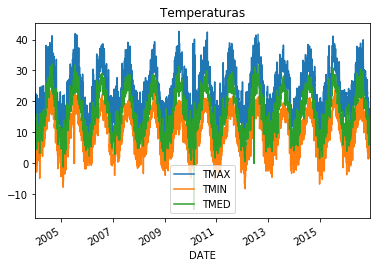

In [28]:
# Pintar la temperatura máx, min, med
data.plot(y=["TMAX", "TMIN", "TMED"])
plt.title('Temperaturas')

## Cajas

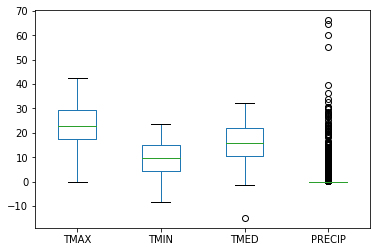

In [29]:
data.loc[:, 'TMAX':'PRECIP'].plot.box()

Pintando la temperatura máxima de las máximas, mínima de las mínimas, media de las medias para cada día del año de los años disponnibles

In [30]:
group_daily = data.groupby(['month', data.index.day])

daily_agg = group_daily.agg({'TMED': 'mean', 'TMAX': 'max', 'TMIN': 'min', 'PRECIP': 'mean'})
daily_agg.head()

TMIN    PRECIP      TMED  TMAX
month                                  
1     1  -1.6  0.076923  8.992308  20.6
      2  -3.0  0.046154  9.000000  20.9
      3  -1.6  0.661538  8.553846  21.0
      4  -0.6  0.400000  8.815385  22.8
      5  -1.0  0.369231  8.461538  21.7

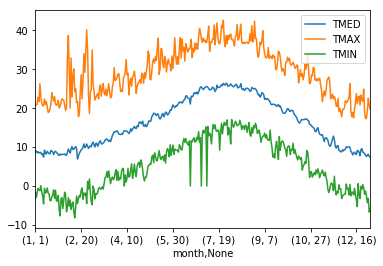

In [31]:
daily_agg.plot(y=['TMED', 'TMAX', 'TMIN'])


## Visualizaciones especiales

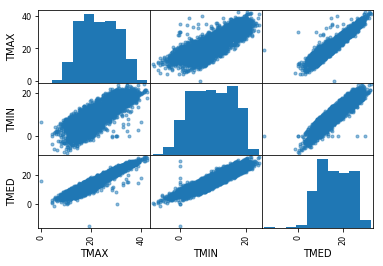

In [32]:
# scatter_matrix
from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Juan Luis Cano, y Álex Sáez 
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [33]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())